In [1]:
import pandas as pd

In [68]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from datetime import datetime

In [22]:
import seaborn as sns

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('Nat_Gas.csv')

In [3]:
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [4]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')

In [5]:
df = df.sort_values(by='Dates')

In [6]:
df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


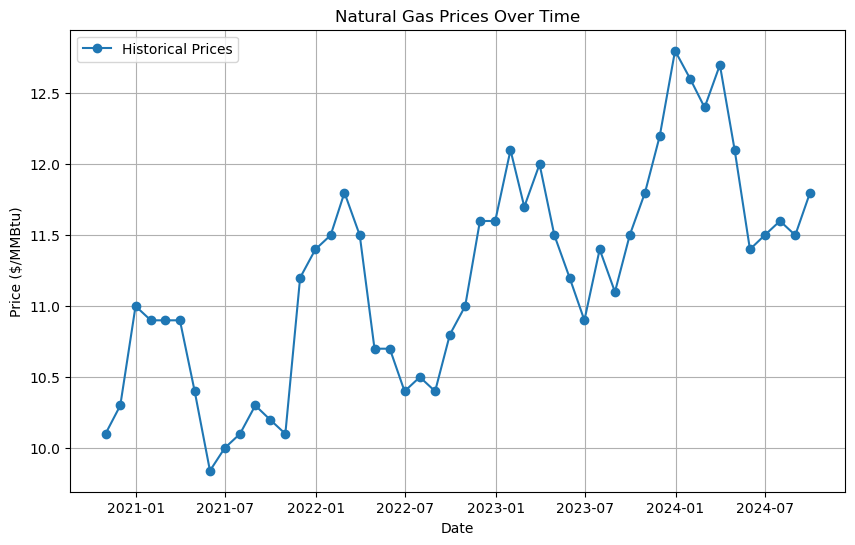

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', label='Historical Prices')
plt.xlabel('Date')
plt.ylabel('Price ($/MMBtu)')
plt.title('Natural Gas Prices Over Time')
plt.grid(True)
plt.legend()
plt.show()

- The Natural gas prices has been increased from 2020 to 2024 respectively
- There is seasonal trend that can be seen here, Lets draw plot according to monthly Natural gas prices
- The price is increasing linearly, Lets check the corelation between prices and the date.

In [16]:
df['Month'] = df['Dates'].dt.month

In [18]:
monthly_avg_price = df.groupby('Month')['Prices'].mean()

In [19]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

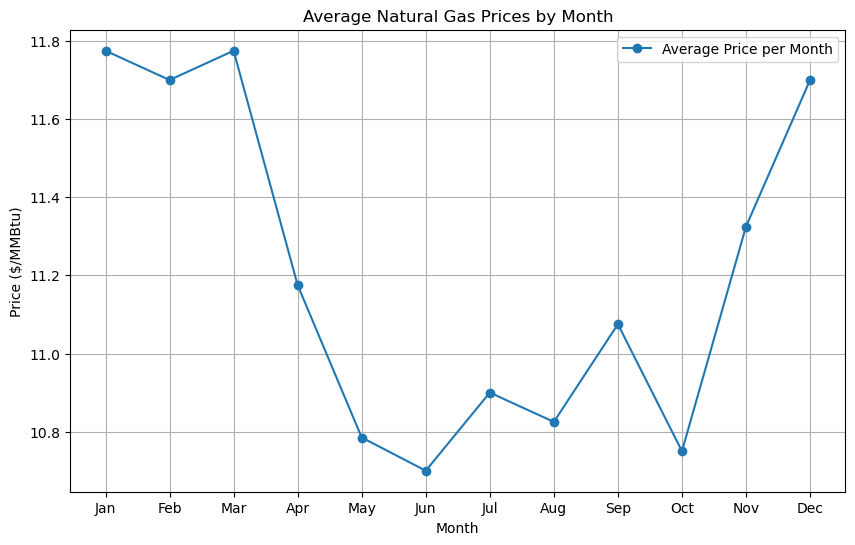

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_avg_price, marker='o', label='Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Price ($/MMBtu)')
plt.title('Average Natural Gas Prices by Month')
plt.grid(True)
plt.legend()
plt.show()

If we see in the above plot, the summer months(MAy, Jun, July, August) is showing the lowest price wile winter months(Dec, Jan, Feb, March) is showing high prices.

In [13]:
df['Date_Ordinal'] = df['Dates'].map(datetime.toordinal)

In [14]:
df.head()

,Dates,Prices,Date_Ordinal
0,2020-10-31,10.1,737729
1,2020-11-30,10.3,737759
2,2020-12-31,11.0,737790
3,2021-01-31,10.9,737821
4,2021-02-28,10.9,737849


C:\Users\user\AppData\Local\Temp\ipykernel_16276\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

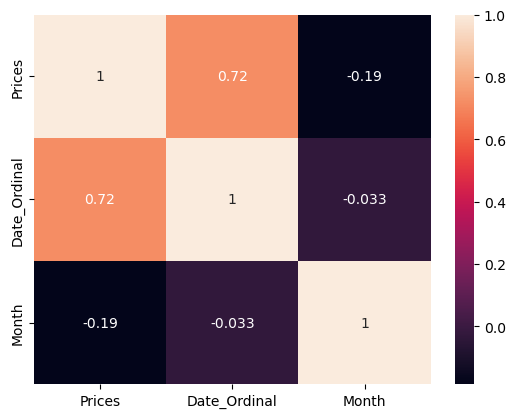

In [25]:
sns.heatmap(df.corr(), annot = True)

The date and the price is showing a corelation coefficient of 0.72 which is significant

lets remove the seasonal effect from the dataset.

<Figure size 1000x800 with 0 Axes>

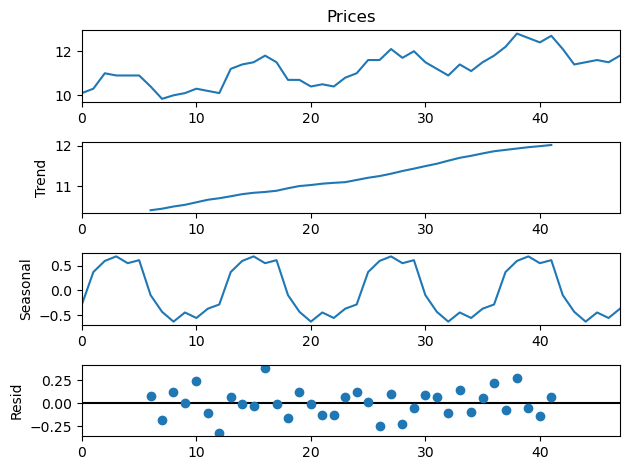

In [28]:
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)

# Plot the decomposition results
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

In [51]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [53]:
df['trend'] = trend

In [57]:
df['residual'] = residual

In [61]:
df['seasonal'] = seasonal

In [62]:
df.head(30)

,Dates,Prices,Date_Ordinal,Month,trend,residual,seasonal
0,2020-10-31,10.10,737729,10,NaN,NaN,-0.284051
1,2020-11-30,10.30,737759,11,NaN,NaN,0.370671
2,2020-12-31,11.00,737790,12,NaN,NaN,0.594838
3,2021-01-31,10.90,737821,1,NaN,NaN,0.686505
4,2021-02-28,10.90,737849,2,NaN,NaN,0.549005
5,2021-03-31,10.90,737880,3,NaN,NaN,0.610116
6,2021-04-30,10.40,737910,4,10.411667,0.083495,-0.095162
7,2021-05-31,9.84,737941,5,10.449167,-0.177338,-0.431829
8,2021-06-30,10.00,737971,6,10.503333,0.126551,-0.629884
9,2021-07-31,10.10,738002,7,10.545,0.000162,-0.445162


In [71]:
df_clean = df.dropna(subset=['Date_Ordinal', 'trend', 'seasonal'])

### Model Training

In [72]:
X = df_clean['Date_Ordinal'].values.reshape(-1, 1)
y_trend = df_clean['trend'].values
model = LinearRegression()
model.fit(X, y_trend)

LinearRegression()

### Estimating price function for any date in the past years

In [81]:
def estimate_price(date_str):
    input_date = pd.to_datetime(date_str)
    date_ordinal = input_date.toordinal()

    predicted_trend = model.predict([[date_ordinal]])[0]

    input_month = input_date.month
    seasonal_component = df_clean[df_clean['Month'] == input_month]['seasonal'].values[0]

    estimated_price = predicted_trend + seasonal_component
    
    return estimated_price

In [82]:
estimate_price('02/10/2022')

11.381553073498603

#### Predicting the Natural gas prices  for the  future dates (next 12 months) 

In [83]:
future_dates = pd.date_range(start=data['Dates'].max(), periods=13, freq='M')
future_ordinal = future_dates.map(datetime.toordinal).values.reshape(-1, 1)
predicted_trend = model.predict(future_ordinal)

In [84]:
# Assuming the seasonality repeats every year (period=12)
seasonal_last_year = data['seasonal'][-12:].values
predicted_seasonality = np.tile(seasonal_last_year, len(future_dates) // 12 + 1)[:len(future_dates)]

In [85]:
predicted_prices = predicted_trend + predicted_seasonality

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Trend': predicted_trend,
    'Predicted_Seasonal': predicted_seasonality,
    'Predicted_Price': predicted_prices
})

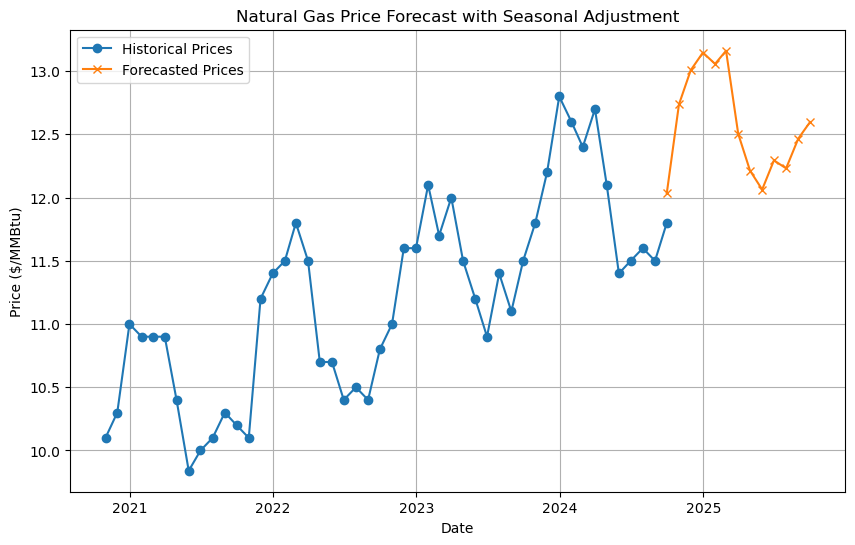

In [86]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Historical Prices', marker='o')
plt.plot(future_dates, predicted_prices, label='Forecasted Prices', marker='x')
plt.xlabel('Date')
plt.ylabel('Price ($/MMBtu)')
plt.title('Natural Gas Price Forecast with Seasonal Adjustment')
plt.grid(True)
plt.legend()
plt.show()

In [87]:
print(forecast_df)

         Date  Predicted_Trend  Predicted_Seasonal  Predicted_Price
0  2024-09-30        12.318427           -0.284051        12.034377
1  2024-10-31        12.366259            0.370671        12.736931
2  2024-11-30        12.412549            0.594838        13.007387
3  2024-12-31        12.460381            0.686505        13.146885
4  2025-01-31        12.508213            0.549005        13.057217
5  2025-02-28        12.551416            0.610116        13.161531
6  2025-03-31        12.599248           -0.095162        12.504086
7  2025-04-30        12.645537           -0.431829        12.213708
8  2025-05-31        12.693369           -0.629884        12.063485
9  2025-06-30        12.739658           -0.445162        12.294496
10 2025-07-31        12.787490           -0.556273        12.231217
11 2025-08-31        12.835322           -0.368773        12.466549
12 2025-09-30        12.881611           -0.284051        12.597560
